In [15]:
#importing important libraries
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as tranforms
import matplotlib.pyplot as plt

In [16]:
#defining important parameters
input_size=784 #28x28
hidden_size=100
num_classes=10 # 0 to 9
num_epochs=2
batch_size=100
learning_rate=0.001

In [17]:
#MNIST
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=tranforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=tranforms.ToTensor(),download=True)
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples=iter(train_loader)
sample,labels=next(examples)
print(sample.shape,"\n",labels.shape)

torch.Size([100, 1, 28, 28]) 
 torch.Size([100])


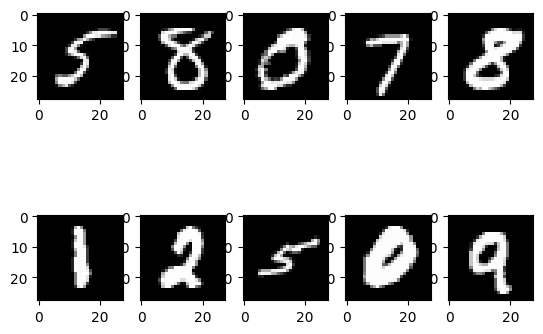

In [18]:
#to see some images
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(sample[i][0], cmap="gray")
plt.show()

In [19]:
# defining the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out


model = NeuralNet(input_size, hidden_size, num_classes)

In [20]:
#loss and optimizer
criteria=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [21]:
#training
n_total_steps=len(train_loader)

for epochs in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28)

    #forward pass
    outputs=model(images)
    loss=criteria(outputs,labels)

    #backward pass
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if((i+1)%100==0):
      print(f"epoch {epochs+1}/{num_epochs},step {i+1}/{n_total_steps},loss={loss.item():.4f}")

epoch 1/2,step 100/600,loss=0.5250
epoch 1/2,step 200/600,loss=0.3493
epoch 1/2,step 300/600,loss=0.3152
epoch 1/2,step 400/600,loss=0.5008
epoch 1/2,step 500/600,loss=0.3042
epoch 1/2,step 600/600,loss=0.2846
epoch 2/2,step 100/600,loss=0.1696
epoch 2/2,step 200/600,loss=0.1835
epoch 2/2,step 300/600,loss=0.1853
epoch 2/2,step 400/600,loss=0.1276
epoch 2/2,step 500/600,loss=0.1066
epoch 2/2,step 600/600,loss=0.1342


In [22]:
#testing
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in (test_loader):
    images=images.reshape(-1,28*28)
    outputs=model(images)

    _, predictions=torch.max(outputs,1)
    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()

  acc=100.0*n_correct/n_samples
  print(f"accuracy={acc}")


accuracy=95.28
